In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
pd.options.display.max_columns = 120

In [2]:
df_part_d = pd.read_csv('https://query.data.world/s/9jx926z39mpdfr3sm46nl59av')
df_part_d.head(5)

,Brand Name,Generic Name,"Claim Count, 2011","Total Spending, 2011","Beneficiary Count, 2011","Total Annual Spending Per User, 2011","Unit Count, 2011","Average Cost Per Unit (Weighted), 2011","Beneficiary Count No LIS, 2011","Average Beneficiary Cost Share No LIS, 2011","Beneficiary Count LIS, 2011","Average Beneficiary Cost Share LIS, 2011","Claim Count, 2012","Total Spending, 2012","Beneficiary Count, 2012","Total Annual Spending Per User, 2012","Unit Count, 2012","Average Cost Per Unit (Weighted), 2012","Beneficiary Count No LIS, 2012","Average Beneficiary Cost Share No LIS, 2012","Beneficiary Count LIS, 2012","Average Beneficiary Cost Share LIS, 2012","Claim Count, 2013","Total Spending, 2013","Beneficiary Count, 2013","Total Annual Spending Per User, 2013","Unit Count, 2013","Average Cost Per Unit (Weighted), 2013","Beneficiary Count No LIS, 2013","Average Beneficiary Cost Share No LIS, 2013","Beneficiary Count LIS, 2013","Average Beneficiary Cost Share LIS, 2013","Claim Count, 2014","Total Spending, 2014","Beneficiary Count, 2014","Total Annual Spending Per User, 2014","Unit Count, 2014","Average Cost Per Unit (Weighted), 2014","Beneficiary Count No LIS, 2014","Average Beneficiary Cost Share No LIS, 2014","Beneficiary Count LIS, 2014","Average Beneficiary Cost Share LIS, 2014","Claim Count, 2015","Total Spending, 2015","Beneficiary Count, 2015","Total Annual Spending Per User, 2015","Unit Count, 2015","Average Cost Per Unit (Weighted), 2015","Beneficiary Count No LIS, 2015","Average Beneficiary Cost Share No LIS, 2015","Beneficiary Count LIS, 2015","Average Beneficiary Cost Share LIS, 2015","Annual Change in Average Cost Per Unit, 2015"
0,10 WASH,SULFACETAMIDE SODIUM,24.0,1569.19,16.0,98.074375,5170.0,0.303518,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1ST TIER UNIFINE PENTIPS,"PEN NEEDLE, DIABETIC",2472.0,57666.73,893.0,64.576405,293160.0,0.196766,422.0,42.347204,471.0,7.545860,3486.0,75786.01,1261.0,60.099929,405484.0,0.186918,607.0,38.242323,654.0,6.501223,4413.0,95304.09,1633.0,58.361353,522780.0,0.182282,833.0,35.618511,800.0,5.880125,6788.0,150749.66,2769.0,54.441914,813255.0,0.185352,1481.0,32.143275,1288.0,5.132989,10749.0,257895.63,5173.0,49.854172,1335132.0,0.193205,2878.0,27.305271,2295.0,3.987891,0.022208
2,ABILIFY DISCMELT,ARIPIPRAZOLE,4677.0,3929705.80,961.0,4089.183975,189351.5,20.753897,83.0,439.876386,878.0,22.165581,4705.0,4529795.27,915.0,4950.595924,192615.5,23.522216,89.0,440.755955,826.0,12.490230,5033.0,5221987.76,967.0,5400.194167,193300.0,27.019006,74.0,493.977297,893.0,12.986976,5186.0,6282391.38,951.0,6606.089779,198161.0,31.703590,85.0,546.043176,866.0,10.375242,2790.0,3735192.84,742.0,5033.952615,102764.0,36.344484,53.0,663.647358,689.0,18.064644,NaN
3,AK-PENTOLATE,CYCLOPENTOLATE HCL,730.0,6893.65,563.0,12.244494,2019.0,3.414388,369.0,7.194173,194.0,1.993557,320.0,3501.42,246.0,14.233415,852.0,4.109648,175.0,8.420971,71.0,3.000423,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,DDAVP,DESMOPRESSIN (NONREFRIGERATED),1044.0,599877.67,194.0,3092.152938,13261.0,45.236232,75.0,372.349733,119.0,14.688319,1001.0,664332.10,193.0,3442.135233,13440.0,49.429472,77.0,457.663766,116.0,21.710345,1032.0,886774.59,202.0,4389.973218,15312.0,57.913701,91.0,483.031099,111.0,16.434775,949.0,1029916.62,163.0,6318.506871,15115.0,68.138711,77.0,643.323766,86.0,11.626163,798.0,984371.25,138.0,7133.125000,13045.0,75.459659,62.0,659.737903,76.0,11.679605,NaN


Do a bit of cleaning:

In [3]:
df_part_d['Generic Name'] = df_part_d['Generic Name'].apply(lambda x: x.strip())
df_part_d['Generic Name'] = df_part_d['Generic Name'].apply(lambda x: x.replace('HCL','HYDROCHLORIDE'))
df_part_d['Generic Name'] = df_part_d['Generic Name'].apply(lambda x: x.replace('PHOSP','PHOSPHATE'))

In [4]:
df_nda = pd.read_excel('data/ndcxls/product_2.xls')
df_nda.head(5)

,PRODUCTID,PRODUCTNDC,PRODUCTTYPENAME,PROPRIETARYNAME,PROPRIETARYNAMESUFFIX,NONPROPRIETARYNAME,DOSAGEFORMNAME,ROUTENAME,STARTMARKETINGDATE,ENDMARKETINGDATE,MARKETINGCATEGORYNAME,APPLICATIONNUMBER,LABELERNAME,SUBSTANCENAME,ACTIVE_NUMERATOR_STRENGTH,ACTIVE_INGRED_UNIT,PHARM_CLASSES,DEASCHEDULE
0,0002-1200_e62214a4-82fd-4e06-90a0-577a32fea93f,0002-1200,HUMAN PRESCRIPTION DRUG,Amyvid,NaN,Florbetapir F 18,"INJECTION, SOLUTION",INTRAVENOUS,20120601.0,NaN,NDA,NDA202008,Eli Lilly and Company,FLORBETAPIR F-18,51,mCi/mL,"Radioactive Diagnostic Agent [EPC],Positron Em...",NaN
1,0002-1407_e7af3676-cd9d-4c30-b127-9f6c46ff1589,0002-1407,HUMAN PRESCRIPTION DRUG,Quinidine Gluconate,NaN,Quinidine Gluconate,SOLUTION,INTRAVENOUS,19510301.0,NaN,NDA,NDA007529,Eli Lilly and Company,QUINIDINE GLUCONATE,80,mg/mL,"Antiarrhythmic [EPC],Cytochrome P450 2D6 Inhib...",NaN
2,0002-1433_a084daa7-c0a0-4996-9fe0-3c1df22c01c7,0002-1433,HUMAN PRESCRIPTION DRUG,Trulicity,NaN,Dulaglutide,"INJECTION, SOLUTION",SUBCUTANEOUS,20141107.0,NaN,BLA,BLA125469,Eli Lilly and Company,DULAGLUTIDE,0.75,mg/.5mL,"GLP-1 Receptor Agonist [EPC],Glucagon-Like Pep...",NaN
3,0002-1434_a084daa7-c0a0-4996-9fe0-3c1df22c01c7,0002-1434,HUMAN PRESCRIPTION DRUG,Trulicity,NaN,Dulaglutide,"INJECTION, SOLUTION",SUBCUTANEOUS,20141107.0,NaN,BLA,BLA125469,Eli Lilly and Company,DULAGLUTIDE,1.5,mg/.5mL,"GLP-1 Receptor Agonist [EPC],Glucagon-Like Pep...",NaN
4,0002-1445_ad2261c2-3be8-4add-8274-0cc565d86ffb,0002-1445,HUMAN PRESCRIPTION DRUG,TALTZ,NaN,ixekizumab,"INJECTION, SOLUTION",SUBCUTANEOUS,20160322.0,NaN,BLA,BLA125521,Eli Lilly and Company,IXEKIZUMAB,80,mg/mL,"Interleukin-17A Antagonist [EPC],Interleukin-1...",NaN


In [5]:
df_nda['NONPROPRIETARYNAME'] = df_nda['NONPROPRIETARYNAME'].apply( lambda x: str(x).upper())
df_nda.head(5)

,PRODUCTID,PRODUCTNDC,PRODUCTTYPENAME,PROPRIETARYNAME,PROPRIETARYNAMESUFFIX,NONPROPRIETARYNAME,DOSAGEFORMNAME,ROUTENAME,STARTMARKETINGDATE,ENDMARKETINGDATE,MARKETINGCATEGORYNAME,APPLICATIONNUMBER,LABELERNAME,SUBSTANCENAME,ACTIVE_NUMERATOR_STRENGTH,ACTIVE_INGRED_UNIT,PHARM_CLASSES,DEASCHEDULE
0,0002-1200_e62214a4-82fd-4e06-90a0-577a32fea93f,0002-1200,HUMAN PRESCRIPTION DRUG,Amyvid,NaN,FLORBETAPIR F 18,"INJECTION, SOLUTION",INTRAVENOUS,20120601.0,NaN,NDA,NDA202008,Eli Lilly and Company,FLORBETAPIR F-18,51,mCi/mL,"Radioactive Diagnostic Agent [EPC],Positron Em...",NaN
1,0002-1407_e7af3676-cd9d-4c30-b127-9f6c46ff1589,0002-1407,HUMAN PRESCRIPTION DRUG,Quinidine Gluconate,NaN,QUINIDINE GLUCONATE,SOLUTION,INTRAVENOUS,19510301.0,NaN,NDA,NDA007529,Eli Lilly and Company,QUINIDINE GLUCONATE,80,mg/mL,"Antiarrhythmic [EPC],Cytochrome P450 2D6 Inhib...",NaN
2,0002-1433_a084daa7-c0a0-4996-9fe0-3c1df22c01c7,0002-1433,HUMAN PRESCRIPTION DRUG,Trulicity,NaN,DULAGLUTIDE,"INJECTION, SOLUTION",SUBCUTANEOUS,20141107.0,NaN,BLA,BLA125469,Eli Lilly and Company,DULAGLUTIDE,0.75,mg/.5mL,"GLP-1 Receptor Agonist [EPC],Glucagon-Like Pep...",NaN
3,0002-1434_a084daa7-c0a0-4996-9fe0-3c1df22c01c7,0002-1434,HUMAN PRESCRIPTION DRUG,Trulicity,NaN,DULAGLUTIDE,"INJECTION, SOLUTION",SUBCUTANEOUS,20141107.0,NaN,BLA,BLA125469,Eli Lilly and Company,DULAGLUTIDE,1.5,mg/.5mL,"GLP-1 Receptor Agonist [EPC],Glucagon-Like Pep...",NaN
4,0002-1445_ad2261c2-3be8-4add-8274-0cc565d86ffb,0002-1445,HUMAN PRESCRIPTION DRUG,TALTZ,NaN,IXEKIZUMAB,"INJECTION, SOLUTION",SUBCUTANEOUS,20160322.0,NaN,BLA,BLA125521,Eli Lilly and Company,IXEKIZUMAB,80,mg/mL,"Interleukin-17A Antagonist [EPC],Interleukin-1...",NaN


In [6]:
df_generic_to_use = df_nda[['NONPROPRIETARYNAME','PHARM_CLASSES']].drop_duplicates()
df_generic_to_use.head()

,NONPROPRIETARYNAME,PHARM_CLASSES
0,FLORBETAPIR F 18,"Radioactive Diagnostic Agent [EPC],Positron Em..."
1,QUINIDINE GLUCONATE,"Antiarrhythmic [EPC],Cytochrome P450 2D6 Inhib..."
2,DULAGLUTIDE,"GLP-1 Receptor Agonist [EPC],Glucagon-Like Pep..."
4,IXEKIZUMAB,"Interleukin-17A Antagonist [EPC],Interleukin-1..."
5,TESTOSTERONE,"Androgen [EPC],Androgen Receptor Agonists [MoA..."


In [7]:
df = pd.merge(left = df_part_d, right = df_generic_to_use,how='left',left_on='Generic Name',right_on='NONPROPRIETARYNAME')

In [8]:
df.sort_values(by='PHARM_CLASSES',inplace = True)
df.drop_duplicates(subset = ['Brand Name','Generic Name'],inplace=True)
df.head()

,Brand Name,Generic Name,"Claim Count, 2011","Total Spending, 2011","Beneficiary Count, 2011","Total Annual Spending Per User, 2011","Unit Count, 2011","Average Cost Per Unit (Weighted), 2011","Beneficiary Count No LIS, 2011","Average Beneficiary Cost Share No LIS, 2011","Beneficiary Count LIS, 2011","Average Beneficiary Cost Share LIS, 2011","Claim Count, 2012","Total Spending, 2012","Beneficiary Count, 2012","Total Annual Spending Per User, 2012","Unit Count, 2012","Average Cost Per Unit (Weighted), 2012","Beneficiary Count No LIS, 2012","Average Beneficiary Cost Share No LIS, 2012","Beneficiary Count LIS, 2012","Average Beneficiary Cost Share LIS, 2012","Claim Count, 2013","Total Spending, 2013","Beneficiary Count, 2013","Total Annual Spending Per User, 2013","Unit Count, 2013","Average Cost Per Unit (Weighted), 2013","Beneficiary Count No LIS, 2013","Average Beneficiary Cost Share No LIS, 2013","Beneficiary Count LIS, 2013","Average Beneficiary Cost Share LIS, 2013","Claim Count, 2014","Total Spending, 2014","Beneficiary Count, 2014","Total Annual Spending Per User, 2014","Unit Count, 2014","Average Cost Per Unit (Weighted), 2014","Beneficiary Count No LIS, 2014","Average Beneficiary Cost Share No LIS, 2014","Beneficiary Count LIS, 2014","Average Beneficiary Cost Share LIS, 2014","Claim Count, 2015","Total Spending, 2015","Beneficiary Count, 2015","Total Annual Spending Per User, 2015","Unit Count, 2015","Average Cost Per Unit (Weighted), 2015","Beneficiary Count No LIS, 2015","Average Beneficiary Cost Share No LIS, 2015","Beneficiary Count LIS, 2015","Average Beneficiary Cost Share LIS, 2015","Annual Change in Average Cost Per Unit, 2015",NONPROPRIETARYNAME,PHARM_CLASSES
20,DELZICOL,MESALAMINE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80102.0,35740582.19,22041.0,1621.549938,17057410.0,2.095311,15972.0,304.312413,6069.0,14.731666,102548.0,50443112.25,21353.0,2362.343102,2.179434e+07,2.314505,15602.0,420.650460,5751.0,23.007564,96581.0,54309177.23,19392.0,2800.597011,20088497.00,2.703496,14246.0,502.897654,5146.0,26.306382,0.168067,MESALAMINE,"Aminosalicylate [EPC],Aminosalicylic Acids [Ch..."
79,DESOXYN,METHAMPHETAMINE HYDROCHLORIDE,1161.0,927072.17,234.0,3961.846880,224620.00,4.127291,89.0,681.981124,145.0,34.206276,956.0,748333.38,158.0,4736.287215,181038.000,4.133571,58.0,806.599138,100.0,44.148000,701.0,636281.54,115.0,5532.882956,135944.0,4.680468,47.0,728.739149,68.0,56.793235,528.0,499263.07,89.0,5609.697416,9.232600e+04,5.407611,38.0,753.525526,51.0,47.023922,430.0,577354.87,74.0,7802.092838,82375.00,7.008860,26.0,929.695000,48.0,53.613958,NaN,METHAMPHETAMINE HYDROCHLORIDE,"Amphetamine Anorectic [EPC],Amphetamines [Chem..."
49,DEPO-TESTOSTERONE,TESTOSTERONE CYPIONATE,16010.0,1033454.70,6828.0,151.355404,69448.19,15.916827,4155.0,77.216132,2673.0,5.327063,43443.0,2778562.45,18351.0,151.412046,188464.743,16.027779,11242.0,75.193386,7109.0,4.870867,64545.0,3764026.09,25885.0,145.413409,240640.9,17.589893,16262.0,80.279940,9623.0,4.893900,50049.0,2988701.34,20360.0,146.792797,1.975515e+05,16.467601,12260.0,81.546718,8100.0,5.355506,36273.0,2199822.07,13150.0,167.286849,153347.05,15.283281,8395.0,80.688005,4755.0,5.440753,-0.074389,TESTOSTERONE CYPIONATE,"Androgen [EPC],Androgen Receptor Agonists [MoA..."
15,DELATESTRYL,TESTOSTERONE ENANTHATE,907.0,84223.96,491.0,171.535560,4904.20,17.173843,279.0,80.012975,212.0,7.837123,59.0,5152.88,44.0,117.110909,305.000,16.894689,31.0,70.959355,13.0,7.381538,30.0,2472.11,29.0,85.245172,150.0,16.480733,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TESTOSTERONE ENANTHATE,"Androgen [EPC],Androgen Receptor Agonists [MoA..."
36,DEPAKOTE,DIVALPROEX SODIUM,54602.0,17964097.95,7509.0,2392.342249,6384695.35,2.840597,1518.0,402.728300,5991.0,23.951185,47884.0,17649376.48,6225.0,2835.241202,5758583.012,3.104232,1292.0,490.289149,4933.0,19.831891,43639.0,17565676.81,5461.0,3216.567810,5252540.0,3.390672

In [9]:
df.shape,df_part_d.drop_duplicates(subset = ['Brand Name','Generic Name']).shape

((100, 55), (100, 53))

In [10]:
df[pd.isnull(df['PHARM_CLASSES'])]['Generic Name']

1                          PEN NEEDLE, DIABETIC
3                  CYCLOPENTOLATE HYDROCHLORIDE
4                DESMOPRESSIN (NONREFRIGERATED)
6                     SULFURIC ACID/SULF PHENOL
9                 TETANUS AND DIPHTHERIA TOX/PF
10                CHLORPHENIRAMINE/PHENYLEPH/DM
14                 CHLOR-MAL/PHENYLEPH/METHSCOP
16               BACITRACIN/POLYMYXIN B SULFATE
18                PERIT. DIALYSIS#6 & DEX 1.5 %
19                                   PREDNISONE
25                  MEPERIDINE HYDROCHLORIDE/PF
28                   LIDOCAINE HYDROCHLORIDE/PF
33               VALPROIC ACID (AS SODIUM SALT)
35               VALPROIC ACID (AS SODIUM SALT)
40                         LEVOMEFOLATE CALCIUM
41        NETUPITANT/PALONOSETRON HYDROCHLORIDE
42                       LEVOMEFOLATE/ALGAL OIL
43                       CYTARABINE LIPOSOME/PF
50                TRIAMCINOLONE/DIMETH/SILICONE
51                          DICLOFENAC/CAPSICUM
52                TRIAMCINOLONE/DIMETH/S

In [11]:
df['PHARM_CLASSES'].value_counts()

Corticosteroid [EPC],Corticosteroid Hormone Receptor Agonists [MoA]                                                                                                                                            13
Central Nervous System Stimulant [EPC],Central Nervous System Stimulation [PE]                                                                                                                                  5
Anti-epileptic Agent [EPC],Decreased Central Nervous System Disorganized Electrical Activity [PE],Mood Stabilizer [EPC]                                                                                         4
Progesterone Congeners [Chemical/Ingredient],Progestin [EPC]                                                                                                                                                    3
Iron Chelating Activity [MoA],Iron Chelator [EPC]                                                                                                               

In [12]:
df.to_csv('data/part_d_with_uses.csv')

We will group by the pharm_classes, and sum over the values (dropping averages, since they don't sum that way)

In [13]:
grouped = df.groupby('PHARM_CLASSES')
df_use_base = grouped.aggregate(np.nansum)
years = [2011,2012,2013,2014,2015]
averages_cols = ['Average Cost Per Unit (Weighted), ',
            'Average Beneficiary Cost Share No LIS, ',
            'Average Beneficiary Cost Share LIS, ']
df_use_base.drop([avg+str(yr) for yr in years for avg in averages_cols]
                 +['Brand Name','Generic Name',
                   'NONPROPRIETARYNAME',
                   'Annual Change in Average Cost Per Unit, 2015'],axis=1,inplace=True)

In [14]:
df_use_base.shape

(25, 35)

In [22]:
df_use_base

,"Claim Count, 2011","Total Spending, 2011","Beneficiary Count, 2011","Total Annual Spending Per User, 2011","Unit Count, 2011","Beneficiary Count No LIS, 2011","Beneficiary Count LIS, 2011","Claim Count, 2012","Total Spending, 2012","Beneficiary Count, 2012","Total Annual Spending Per User, 2012","Unit Count, 2012","Beneficiary Count No LIS, 2012","Beneficiary Count LIS, 2012","Claim Count, 2013","Total Spending, 2013","Beneficiary Count, 2013","Total Annual Spending Per User, 2013","Unit Count, 2013","Beneficiary Count No LIS, 2013","Beneficiary Count LIS, 2013","Claim Count, 2014","Total Spending, 2014","Beneficiary Count, 2014","Total Annual Spending Per User, 2014","Unit Count, 2014","Beneficiary Count No LIS, 2014","Beneficiary Count LIS, 2014","Claim Count, 2015","Total Spending, 2015","Beneficiary Count, 2015","Total Annual Spending Per User, 2015","Unit Count, 2015","Beneficiary Count No LIS, 2015","Beneficiary Count LIS, 2015","Total Spending, Max","Claim Count, Max"
PHARM_CLASSES,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
"Aminosalicylate [EPC],Aminosalicylic Acids [Chemical/Ingredient]",0.0,0.000000e+00,0.0,0.000000,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.0,0.000000,0.000000e+00,0.0,0.0,80102.0,3.574058e+07,22041.0,1621.549938,1.705741e+07,15972.0,6069.0,102548.0,5.044311e+07,21353.0,2362.343102,2.179434e+07,15602.0,5751.0,96581.0,5.430918e+07,19392.0,2800.597011,2.008850e+07,14246.0,5146.0,5.430918e+07,102548.0
"Amphetamine Anorectic [EPC],Amphetamines [Chemical/Ingredient],Appetite Suppression [PE],Central Nervous System Stimulant [EPC],Central Nervous System Stimulation [PE],Increased Sympathetic Activity [PE]",1161.0,9.270722e+05,234.0,3961.846880,2.246200e+05,89.0,145.0,956.0,7.483334e+05,158.0,4736.287215,1.810380e+05,58.0,100.0,701.0,6.362815e+05,115.0,5532.882956,1.359440e+05,47.0,68.0,528.0,4.992631e+05,89.0,5609.697416,9.232600e+04,38.0,51.0,430.0,5.773549e+05,74.0,7802.092838,8.237500e+04,26.0,48.0,7.483334e+05,956.0
"Androgen [EPC],Androgen Receptor Agonists [MoA],Androstanes [Chemical/Ingredient]",16917.0,1.117679e+06,7319.0,322.890964,7.435239e+04,4434.0,2885.0,43502.0,2.783715e+06,18395.0,268.522955,1.887697e+05,11273.0,7122.0,64575.0,3.766498e+06,25914.0,230.658581,2.407909e+05,16262.0,9623.0,50049.0,2.988701e+06,20360.0,146.792797,1.975515e+05,12260.0,8100.0,36273.0,2.199822e+06,13150.0,167.286849,1.533470e+05,8395.0,4755.0,3.766498e+06,64575.0
"Anti-epileptic Agent [EPC],Decreased Central Nervous System Disorganized Electrical Activity [PE],Mood Stabilizer [EPC]",141236.0,4.214336e+07,20430.0,10391.379894,1.640122e+07,3882.0,16548.0,122997.0,4.106535e+07,16260.0,12413.033827,1.476827e+07,3181.0,13079.0,112959.0,4.121151e+07,14421.0,13806.225601,1.368409e+07,3074.0,11347.0,107381.0,4.421022e+07,14147.0,14797.330508,1.329052e+07,3172.0,10975.0,99123.0,4.447474e+07,12450.0,16101.500808,1.240041e+07,2650.0,9800.0,4.447474e+07,122997.0
"Antihelminthic [EPC],Cytochrome P450 1A Inducers [MoA]",2072.0,1.753495e+05,1418.0,123.659718,6.764400e+04,776.0,642.0,4383.0,1.600734e+06,3427.0,467.094911,8.933300e+04,1554.0,1873.0,7193.0,4.333797e+06,5619.0,771.275551,9.453500e+04,2555.0,3064.0,7524.0,9.566410e+06,5760.0,1660.835156,9.112700e+04,2633.0,3127.0,7217.0,1.013927e+07,5548.0,1827.554706,8.139000e+04,2409.0,3139.0,1.013927e+07,7524.0
Antirheumatic Agent [EPC],765.0,2.887978e+05,148.0,1951.336284,5.915000e+04,92.0,56.0,750.0,3.412059e+05,142.0,2402.858169,6.047700e+04,97.0,45.0,741.0,4.108773e+05,157.0,2617.052675,6.534300e+04,112.0,45.0,672.0,1.702161e+06,147.0,11579.328299,6.222200e+04,106.0,41.0,575.0,3.034060e+06,123.0,24667.156992,5.745500e+04,78.0,45.0,3.034060e+06,750.0
Atypical Antipsychotic [EPC],4677.0,3.929706e+06,961.0,4089.183975,1.893515e+05,83.0,878.0,4705.0,4.529795e+06,915.0,4950.595924,1.926155e+05,89.0,826.0,5033.0,5.221988e+06,967.0,5400.194167,1.933000e+05,74.0,893.0,5186.0,6.282391e+06,951.0,6606.089779,1.981610e+05,85.0,866.0,2790.0,3.735193e+06,742.0,5033.952615,1.027640e+05,53.0,689.0,6.2

In [16]:
df_use_base.to_csv('data/part_D_aggregated_over_uses.csv')

Let's do some quick visualization:

In [20]:
columns_of_interest = ['Total Spending, ','Claim Count, ']
years = [2012,2013,2014,2015]
for column in columns_of_interest:
    df_use_base[column+'Max'] = np.abs(df_use_base[[column+str(yr) for yr in years]]).max(axis=1)

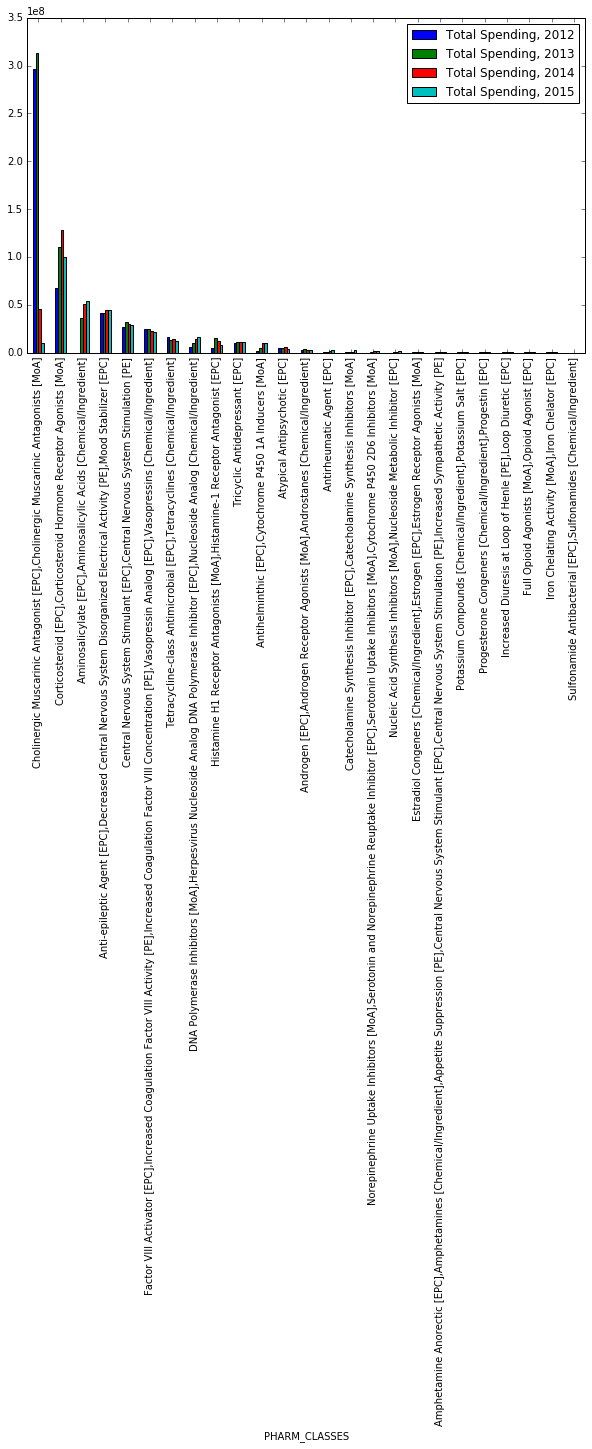

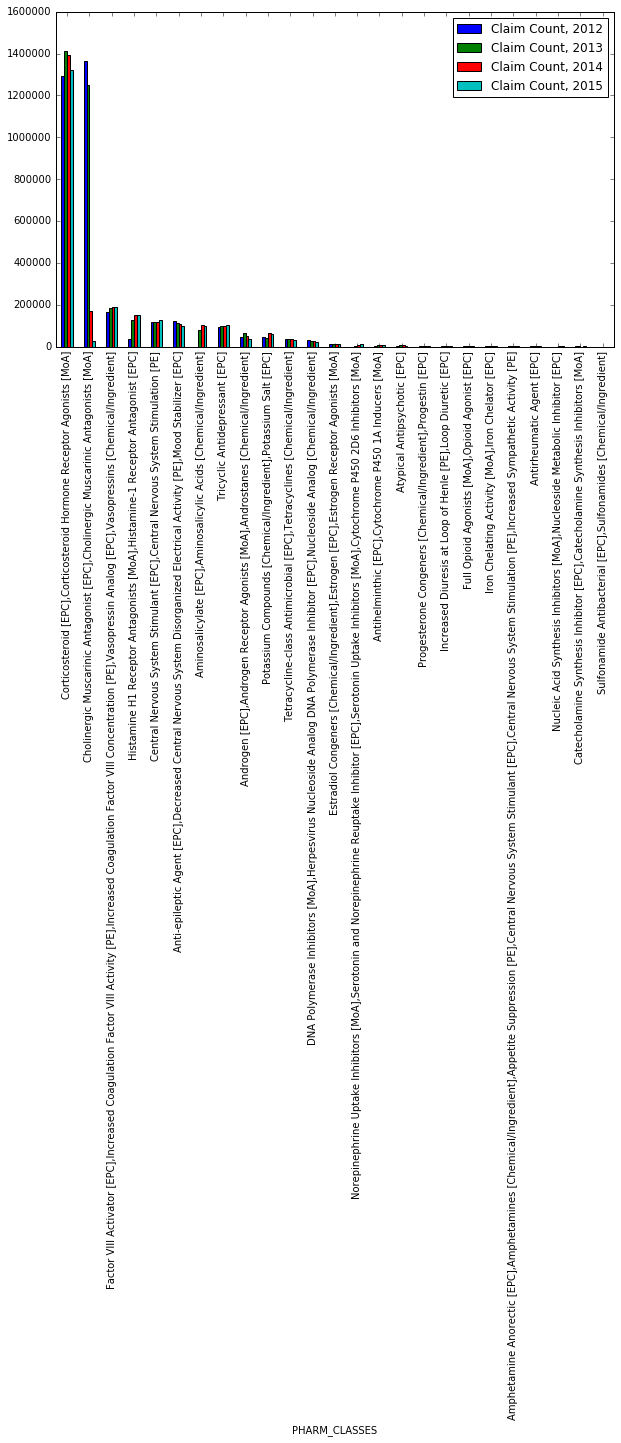

In [29]:
for column in columns_of_interest:
    df_sorted = df_use_base.sort_values(by=column+'Max',ascending=False)

    df_sorted[[column
             +str(yr) for yr in years]].plot.bar(figsize = (10,6))
    plt.show()